In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

This code is written in Python and uses the PyTorch library to load the MNIST dataset for training and testing machine learning models. MNIST is a popular dataset of handwritten digits (0-9) commonly used for image classification tasks.

Let's break down the code:

1. `datasets.MNIST`: This is a class provided by PyTorch in the `torchvision.datasets` module specifically designed for handling the MNIST dataset.

2. `root='data'`: Specifies the directory where the dataset will be downloaded. In this case, it's set to 'data'.

3. `train=True` (for `train_data`) and `train=False` (for `test_data`): These parameters indicate whether the dataset should be the training set (`train=True`) or the testing set (`train=False`).

4. `transform=ToTensor()`: This parameter applies a transformation to the data. In this case, it uses the `ToTensor()` transformation, which converts the images from PIL Image format to PyTorch tensors. PyTorch tensors are the basic building blocks for creating and training neural networks.

5. `download=True`: This parameter specifies whether to download the dataset if it is not already present in the specified root directory.

In summary, this code snippet is creating two datasets: `train_data` for training and `test_data` for testing, both based on the MNIST dataset. The images in these datasets will be converted to PyTorch tensors, making them suitable for training neural network models. If the dataset is not present in the 'data' directory, it will be downloaded.

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True 
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True 
)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

This code is setting up PyTorch `DataLoader` objects for the training and testing datasets created using the MNIST dataset. `DataLoader` is a PyTorch utility that helps efficiently load and iterate over batches of data during the training process.

Let's break down the code:

1. `from torch.utils.data import DataLoader`: Imports the `DataLoader` class from the PyTorch `torch.utils.data` module.

2. `loaders`: This is a dictionary that will contain two `DataLoader` objects - one for the training data and one for the testing data.

3. `"train"` and `"test"`: These are keys in the `loaders` dictionary, representing the training and testing data loaders, respectively.

4. `DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1)`: Creates a `DataLoader` for the training data (`train_data`). Let's break down the parameters:
   - `train_data`: The dataset to be loaded.
   - `batch_size=100`: Specifies the number of samples in each batch. In this case, each batch will contain 100 samples.
   - `shuffle=True`: Randomly shuffles the data at the beginning of each epoch. Shuffling the data helps the model generalize better during training.
   - `num_workers=1`: Number of subprocesses to use for data loading. Setting it to 1 means that the data loading will be performed in the main process.

5. `DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)`: Similar to the training data loader, this creates a `DataLoader` for the testing data (`test_data`) with the same parameters.

In summary, this code sets up two `DataLoader` objects, one for training and one for testing, each configured to load data in batches of 100, shuffle the data, and use a single worker process for loading data. These loaders can be used in the training and testing loops of a machine learning model to efficiently iterate over the data during the training process.

In [8]:
from torch.utils.data import DataLoader

loaders = {
    "train": DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    
    "test": DataLoader(test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1)
}


In [9]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x19c1f158a50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x19c1f15ae50>}

This code defines a convolutional neural network (CNN) using the PyTorch library. Let's break it down step by step:

1. `import torch.nn as nn`: Imports the neural network module from the PyTorch library.

2. `import torch.nn.functional as F`: Imports the functional interface for operations that don't have any parameters like weights.

3. `import torch.optim as optim`: Imports the optimization module from PyTorch.

4. `class CNN(nn.Module):`: Defines a class named `CNN` that inherits from the `nn.Module` class, which is the base class for all neural network modules in PyTorch.

5. `def __init__(self):`: The constructor method for the `CNN` class. It initializes the layers of the neural network.

   - `self.conv1 = nn.Conv2d(1, 10, kernel_size=5)`: Defines the first convolutional layer with 1 input channel, 10 output channels, and a kernel size of 5x5.
   
   - `self.conv2 = nn.Conv2d(10, 20, kernel_size=5)`: Defines the second convolutional layer with 10 input channels (from the previous layer), 20 output channels, and a kernel size of 5x5.
   
   - `self.conv2_drop = nn.Dropout2d()`: Defines a 2D dropout layer. Dropout is a regularization technique that randomly sets a fraction of input units to zero during training to prevent overfitting.
   
   - `self.fc1 = nn.Linear(320, 50)`: Defines the first fully connected (dense) layer with 320 input features and 50 output features.
   
   - `self.fc2 = nn.Linear(50, 10)`: Defines the second fully connected layer with 50 input features and 10 output features (corresponding to the 10 classes in the MNIST dataset).

6. `def forward(self, x):`: Defines the forward pass of the neural network. This method is called when the model is passed an input `x`.

   - `x = F.relu(F.max_pool2d(self.conv1(x), 2))`: Applies the first convolutional layer, followed by a ReLU activation function and max pooling with a kernel size of 2x2.
   
   - `x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))`: Applies the second convolutional layer, followed by a dropout, ReLU activation, and max pooling with a kernel size of 2x2.
   
   - `x = x.view(-1, 320)`: Flattens the tensor to prepare it for the fully connected layers.
   
   - `x = F.relu(self.fc1(x))`: Applies the first fully connected layer with a ReLU activation function.
   
   - `x = F.dropout(x, training=self.training)`: Applies dropout to the output of the first fully connected layer.
   
   - `x = self.fc2(x)`: Applies the second fully connected layer.
   
   - `return F.log_softmax(x, dim=1)`: Applies the log softmax function to the output, providing the final probability distribution over the classes.

In summary, this code defines a simple CNN architecture for image classification, specifically designed for the MNIST dataset. It uses convolutional layers, max pooling, dropout, and fully connected layers. The forward method specifies how the input is processed through these layers to produce the final output.

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)




This code is an example of training and testing a neural network using PyTorch. Let's break down the key components:

1. **Device Configuration:**
   ```python
   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
   ```
   - This line checks if a CUDA-enabled GPU is available. If so, it sets the device to 'cuda', otherwise to 'cpu'. This is useful for utilizing GPU acceleration if available.

2. **Model Initialization:**
   ```python
   model = CNN().to(device)
   ```
   - It creates an instance of the CNN model and moves it to the specified device (either GPU or CPU).

3. **Optimizer and Loss Function:**
   ```python
   optimizer = optim.Adam(model.parameters(), lr=0.01)
   loss_fn = nn.CrossEntropyLoss()
   ```
   - It sets up an Adam optimizer to update the model parameters during training, and uses cross-entropy loss as the criterion for training.

4. **Training Function:**
   ```python
   def train(epoch):
       # ...
   ```
   - The `train` function is responsible for training the model for a specified number of epochs.
   - It iterates through batches of training data, performs forward and backward passes, calculates the loss, and updates the model weights using gradient descent.
   - Training progress is printed every 20 batches.

5. **Testing Function:**
   ```python
   def test():
       # ...
   ```
   - The `test` function evaluates the trained model on the test dataset.
   - It calculates the average test loss and the accuracy of the model on the test set.
   - The model is put into evaluation mode (`model.eval()`), and the `torch.no_grad()` context is used to disable gradient computation during testing.

6. **Data Loading:**
   - The code assumes the existence of data loaders (`loaders['train']` and `loaders['test']`) that provide batches of training and testing data.

7. **Training and Testing Loop:**
   ```python
   for epoch in range(num_epochs):
       train(epoch)
   test()
   ```
   - The model is trained for a specified number of epochs using the `train` function.
   - After training, the `test` function is called to evaluate the model on the test set.

This code demonstrates the standard structure of training and testing loops for a PyTorch neural network. It's assumed that the dataset and data loaders (`loaders['train']` and `loaders['test']`) are set up outside this code. Adjustments may be needed based on the specifics of your dataset and model.

In [11]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Create an instance of the CNN model
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate the loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

       # Print training progress
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{ batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

# Assuming you have a DataLoader named train_loader for your training data
# and log_interval is a variable indicating how often to print training progress.
# You'll need to set these values accordingly.

def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:  # Assuming you have a DataLoader named test_loader
            data, target = data.to(device), target.to(device)

            # Forward pass
            output = model(data)

            # Calculate the test loss
            test_loss += loss_fn(output, target).item()

            # Get the index of the max log-probability (predicted class)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Average test loss
    test_loss /= len(loaders['test'].dataset)

    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders['test'].dataset)} ({100.*correct/len(loaders['test'].dataset):.0f}%\n")



This code snippet is a simple training and testing loop that iterates over a specified number of epochs. It's designed to train a neural network using the `train` function and evaluate its performance on a test set using the `test` function. Here's the breakdown:

```python
for epoch in range(1, 11):
    train(epoch)
    test()
```

- **Loop Over Epochs:**
  - `for epoch in range(1, 11):` creates a loop that iterates over the range from 1 to 10 (inclusive). This loop represents the training process over multiple epochs.

- **Training:**
  - `train(epoch)` is called inside the loop. This function is assumed to perform the training process for one epoch. The `epoch` variable is likely used within the `train` function to keep track of the current epoch.

- **Testing:**
  - `test()` is called immediately after the training for the current epoch. This function is responsible for evaluating the model's performance on a test set. It calculates the average test loss and the accuracy of the model on the test data.

- **Iteration:**
  - The loop continues to the next epoch, repeating the training and testing steps.

In summary, this code runs a training loop for 10 epochs. In each epoch, it trains the model using the `train` function and then evaluates its performance on the test set using the `test` function. This is a common structure in deep learning training scripts to iteratively improve the model over multiple passes through the training data. Adjustments may be necessary depending on the specifics of your neural network architecture and dataset.

In [12]:
for epoch in range(1,11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	2.313310
Train Epoch: 1 [2000/60000 (3%)]	0.950831
Train Epoch: 1 [4000/60000 (7%)]	0.971186
Train Epoch: 1 [6000/60000 (10%)]	0.679772
Train Epoch: 1 [8000/60000 (13%)]	0.492723
Train Epoch: 1 [10000/60000 (17%)]	0.617950
Train Epoch: 1 [12000/60000 (20%)]	0.683835
Train Epoch: 1 [14000/60000 (23%)]	0.446239
Train Epoch: 1 [16000/60000 (27%)]	1.105363
Train Epoch: 1 [18000/60000 (30%)]	0.529517
Train Epoch: 1 [20000/60000 (33%)]	0.352600
Train Epoch: 1 [22000/60000 (37%)]	0.250608
Train Epoch: 1 [24000/60000 (40%)]	0.508317
Train Epoch: 1 [26000/60000 (43%)]	0.334604
Train Epoch: 1 [28000/60000 (47%)]	0.609673
Train Epoch: 1 [30000/60000 (50%)]	0.635350
Train Epoch: 1 [32000/60000 (53%)]	0.527652
Train Epoch: 1 [34000/60000 (57%)]	0.513418
Train Epoch: 1 [36000/60000 (60%)]	0.349972
Train Epoch: 1 [38000/60000 (63%)]	0.323529
Train Epoch: 1 [40000/60000 (67%)]	0.292243
Train Epoch: 1 [42000/60000 (70%)]	0.323808
Train Epoch: 1 [44000/60000 (73%)]	0.560108

In [13]:
device

device(type='cpu')

This code snippet is used to make a prediction with a trained neural network model and visualize the input image along with the model's prediction. Let's break down the key components:

```python
import matplotlib.pyplot as plt
```

- This line imports the `matplotlib.pyplot` module, which is commonly used for creating visualizations, such as plots and images.

```python
model.eval()
```

- Sets the model to evaluation mode. This is necessary when you want to make predictions or evaluate the model on a test set. It ensures that layers like dropout behave differently during evaluation compared to training.

```python
data, target = test_data[2]
```

- Retrieves an input image (`data`) and its corresponding target label (`target`) from the test dataset (`test_data`). The index 2 is used as an example, and you can replace it with any other index to visualize a different image.

```python
data = data.unsqueeze(0).to(device)
```

- Prepares the input data for the model by adding a batch dimension (`unsqueeze(0)`) and moving it to the specified device (either GPU or CPU).

```python
output = model(data)
```

- Performs a forward pass through the model to obtain the output. The `output` tensor contains the model's prediction for the input image.

```python
prediction = output.argmax(dim=1, keepdim=True).item()
```

- Determines the predicted class by finding the index of the maximum value along dimension 1. The result is a scalar value (`item()`) representing the predicted class.

```python
print(f"Prediction: {prediction}")
```

- Prints the predicted class to the console.

```python
image = data.squeeze(0).squeeze(0).cpu().numpy()
```

- Prepares the image for visualization by removing the added batch dimension (`squeeze(0)`) and converting the PyTorch tensor to a NumPy array on the CPU.

```python
plt.imshow(image, cmap='gray')
plt.show()
```

- Uses Matplotlib to display the image. The `cmap='gray'` argument indicates that the image is grayscale. The `plt.show()` command is used to display the image in a pop-up window.

In summary, this code snippet loads an image from the test dataset, passes it through a trained neural network model, prints the predicted class, and visualizes the image using Matplotlib. It's a useful way to inspect how well the model is performing on individual examples.

Prediction: 1


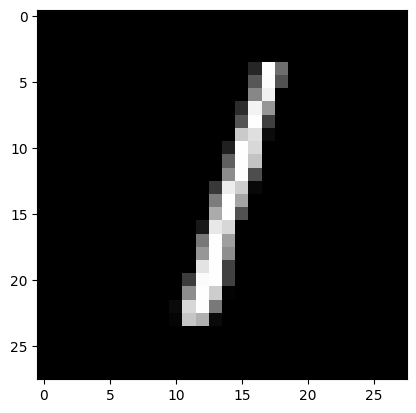

In [14]:
import matplotlib.pyplot as plt
model.eval()
data,target = test_data[2]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1,keepdim = True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()